In [53]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats

credit = pd.read_csv("Data/Credit.csv", index_col=0)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


### Bivariate Analysis
Analisis Bi-variate menemukan hubungan antara dua variabel. Di sini, kita mencari hubungan dan disasosiasi antara variabel pada tingkat signifikansi yang ditentukan sebelumnya. Kita dapat melakukan analisis bivariat untuk setiap kombinasi variabel kategori dan numerik.

* Numerik & numerik
* Kategorik & Kategorik
* Kategorik & numerik

### Numerik & Numerik

Untuk mengetahui apakah ada hubungan antara 2 variabel numerik digunakan **scatter plot**. Dari scatter plot dapat dilihat hubungan 2 variabel: tidak berkorelasi, berkorelasi positip, atau berkorelasi negatip. 

Untuk melihat seberapa kuat korelasi antar 2 variabel digunakan nilai koefisien korelasi (r). Jika koefisien korelasi r:
* r > 0: berkorelasi positip
* r = 0: tidak berkorelasi
* r < 0: berkorelasi negatip


In [ ]:
#cek missing values
credit.isnull().sum()

In [ ]:
# Scatter plot antara variabel 'Education' dan 'Income'
credit.plot.scatter(x='Education', y='Income')

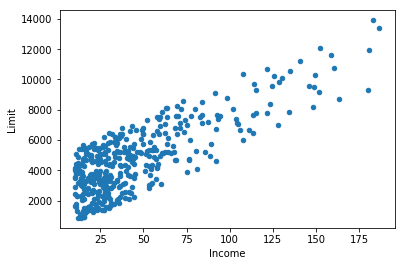

In [54]:
# Scatter plot antara variabel 'Income' dan 'Limit'
credit.plot.scatter(x='Income', y='Limit')

In [ ]:
# Membuat matrix scatter plot antar variabel numerik yang ada dalam DataFrame
pd.plotting.scatter_matrix(credit, alpha=0.2, figsize=(15,15))

In [ ]:

credit.corr()

### Kategorik & Kategorik:

Untuk menentukan hubungan antara 2 variabel kategorik digunakan metode berikut:

* **Two-way table**: Baris merupakan nilai dari satu variabel dan kolom merupakan nilai dari variabel yang lain. 
* **Stacked Column Chart**: Merupakan visualisasi dari 2-way table.
* **Chi-Square Test**: Untuk menentukan seberapa signifikan hubungan antara 2 variabel kategorik.


### Two-way table

In [ ]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
pd.crosstab(credit.Gender, credit.Student, margins = True)

### Stack column chart

In [ ]:
# Membuat Stack Column Chart dari two-way table
temp = pd.crosstab(credit.Student, credit.Gender)
temp.plot.bar(stacked=True)

### Chi-square test

In [ ]:
student_tab = pd.crosstab(credit.Student, credit.Gender, margins = True)
student_tab

In [ ]:
# membuat matrix observed
student_tab.columns = ["Male","Female","row_totals"]

student_tab.index = ["No","Yes","col_totals"]

observed = student_tab.iloc[0:2,0:2]   # Get table without totals for later use
observed

In [ ]:
# Membuat matrix expected
expected =  np.outer(student_tab["row_totals"][0:2],
                     student_tab.loc["col_totals"][0:2]) / 400

expected = pd.DataFrame(expected)

expected.columns = ["Male","Female"]
expected.index = ["No","Yes"]

expected

In [ ]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

In [ ]:
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Karena nilai dari chi_squared_stat < Critical value, make kedua variabel independent (tidak berkorelasi).

In [ ]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed)

Arti dari output:
chi-square statistic = 0.872
the p-value = 0.3
the degrees of freedom = 1 
the expected counts.

## Latihan

In [44]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,experience,name,preTestScore,postTestScore
0,Nighthawks,infantry,veteran,Miller,4,25
1,Nighthawks,infantry,rookie,Jacobson,24,94
2,Nighthawks,cavalry,veteran,Ali,31,57
3,Nighthawks,cavalry,rookie,Milner,2,62
4,Dragoons,infantry,veteran,Cooze,3,70
5,Dragoons,infantry,rookie,Jacon,4,25
6,Dragoons,cavalry,veteran,Ryaner,24,94
7,Dragoons,cavalry,rookie,Sone,31,57
8,Scouts,infantry,veteran,Sloan,2,62
9,Scouts,infantry,rookie,Piger,3,70


### Regresi Linier

In [50]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats
from sklearn import linear_model

credit = pd.read_csv("Data/Credit.csv", index_col=0)
credit.head(3)
 
X = credit['Income']
Y = credit['Limit']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

(400, 1)

In [51]:
# Split data menjadi training/testing sets
X_train = X[:-150]
X_test = X[-150:]
 
# Split targets menjadi training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]
X_train.shape

(250, 1)

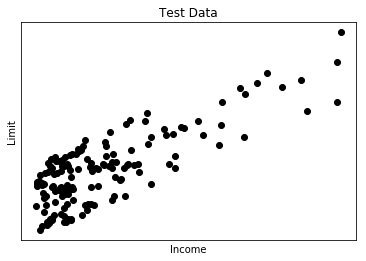

In [52]:
# Scatter plot
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Income')
plt.ylabel('Limit')
plt.xticks(())
plt.yticks(())
 
plt.show()

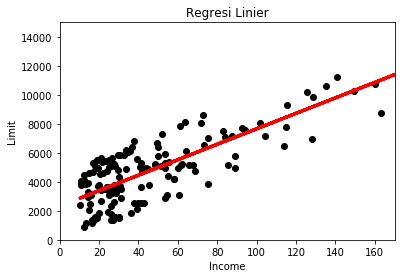

In [65]:
# Membuat obyek regresi linear
regr = linear_model.LinearRegression()
 
# Train model menggunakan training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Regresi Linier')
plt.xlabel('Income')
plt.ylabel('Limit')

plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.axis([0, 170, 0, 15000])
plt.show()

In [59]:
print(regr.predict(150))

[[10325.25739161]]
